### CNN
* http://andrew.gibiansky.com/blog/machine-learning/convolutional-neural-networks/
* http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/
* https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721
* https://algotravelling.com/ru/%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%8D%D1%82%D0%BE-%D0%B2%D0%B5%D1%81%D0%B5%D0%BB%D0%BE-3/
* https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/
* https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b
* https://github.com/udsclub/images-classification-caltech
* https://www.asozykin.ru/courses/nnpython

### Preprocessing
* https://www.embedded-vision.com/sites/default/files/apress/computervisionmetrics/chapter2/9781430259299_Ch02.pdf
* https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network
* https://www.quora.com/What-are-some-ways-of-pre-procesing-images-before-applying-convolutional-neural-networks-for-the-task-of-image-classification
* http://cs231n.github.io/neural-networks-2/#datapre
* http://www.robots.ox.ac.uk/~vgg/practicals/cnn/#getting-started
* https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html
* https://stackoverflow.com/a/10169025/5151861
* augmentation tf+keras http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

#### Augmentation
* rotation: random with angle between 0° and 360° (uniform)
* translation: random with shift between -10 and 10 pixels (uniform)
* rescaling: random with scale factor between 1/1.6 and 1.6 (log-uniform)
* flipping: yes or no (bernoulli)
* shearing: random with angle between -20° and 20° (uniform)
* stretching: random with stretch factor between 1/1.3 and 1.3 (log-uniform)
* https://www.tensorflow.org/api_docs/python/tf/image
* https://github.com/aleju/imgaug
* http://augmentor.readthedocs.io/en/master/
* https://github.com/analysiscenter/dataset

* Gaussian blurring of images
* Morphology—Counting Objects

Ресайзинг - важно
* http://ufldl.stanford.edu/wiki/index.php/UFLDL_Tutorial

* одну- дву- слойную cnn
* графики ошибки
* 224х224
* 32х32
* в керас
* серые картинки 
* тензор борд
* презентация по аугментации

whitening

In [407]:
from scipy import ndimage
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image
from scipy import misc
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
from sklearn.model_selection import train_test_split

%matplotlib inline

In [408]:
pixel_depth = 255.0 # number of levels per pixel
num_classes = 257 # number of total classes
test_folder = 'data/test' # dir, where test set is placed
train_folder = 'data/train' # dir, where train set is placed
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32

In [409]:
def reshape(img):
    nsamples, nx, ny = img.shape
    return img.reshape((nsamples,nx*ny))

In [ ]:
def load_test_set():
    num_images = 0
    images = os.listdir(test_folder)
    test_set = []
    for image in images:
        image = os.path.join(test_folder, image)
        test_set.append(io.imread(image))
    return test_set

In [ ]:
test_set = load_test_set()

In [410]:
def load_train_set(df):
    folders = os.listdir(train_folder)
    for ind, folder in enumerate(folders):
        #if ind % 60 == 0:
            folder = os.path.join(train_folder, folder)
            print('{}'.format(folder))
            if os.path.isdir(folder):
                image_files = os.listdir(folder)
                for image_file in image_files:
                    if not image_file.startswith('.'):
                        image = misc.imread(os.path.join(folder, image_file))
                        #target = folder.split('.')[0].split('/')[2]
                        target = int(folder.split('.')[0].split('/')[2])
                        df.loc[df.shape[0]]=[folder[15:], image_file, image.shape[0], image.shape[1], image.dtype, target]

In [411]:
df = pd.DataFrame(columns = ['category', 'image_name', 'width', 'height', 'type', 'target'])

In [413]:
%%time
train_set = load_train_set(df)

data/train/.DS_Store
data/train/001.ak47
data/train/002.american-flag
data/train/003.backpack
data/train/004.baseball-bat
data/train/005.baseball-glove
data/train/006.basketball-hoop
data/train/007.bat
data/train/008.bathtub
data/train/009.bear
data/train/010.beer-mug
data/train/011.billiards
data/train/012.binoculars
data/train/013.birdbath
data/train/014.blimp
data/train/015.bonsai-101
data/train/016.boom-box
data/train/017.bowling-ball
data/train/018.bowling-pin
data/train/019.boxing-glove
data/train/020.brain-101
data/train/021.breadmaker
data/train/022.buddha-101
data/train/023.bulldozer
data/train/024.butterfly
data/train/025.cactus
data/train/026.cake
data/train/027.calculator
data/train/028.camel
data/train/029.cannon
data/train/030.canoe
data/train/031.car-tire
data/train/032.cartman
data/train/033.cd
data/train/034.centipede
data/train/035.cereal-box
data/train/036.chandelier-101
data/train/037.chess-board
data/train/038.chimp
data/train/039.chopsticks
data/train/040.cockroac

In [414]:
df.to_csv('data/train_data')

### Classes distribution

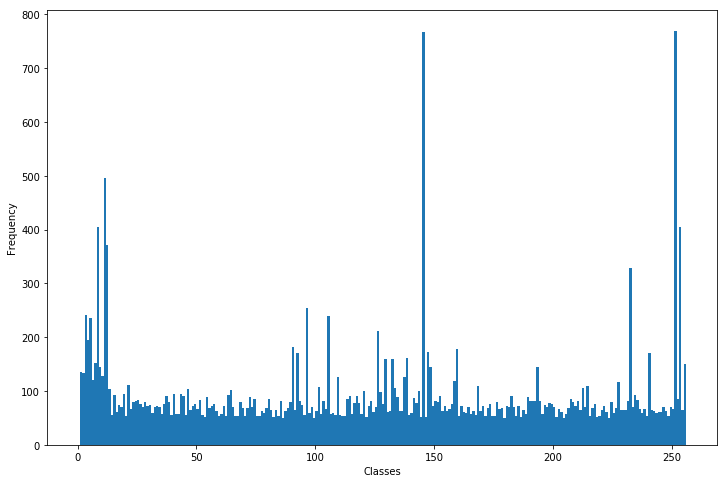

In [415]:
plt.figure(figsize=(12, 8))
plt.hist(df['target'], bins=range(len(df['target'].unique())))
plt.xlabel('Classes')
plt.ylabel('Frequency');

In [425]:
df = pd.read_csv('train_data', index_col=0)

In [416]:
y = df['target']
X = df.copy()
X.drop('target', axis=1, inplace=True)
df.to_csv('train_data')

In [281]:
X.to_csv('data/train_features')
y.to_csv('data/train_target')

In [428]:
def check_dir(directory):
    if not os.path.exists(directory):
        create_dir(directory)

In [429]:
def create_dir(directory):
    os.makedirs(directory)

In [381]:
def norm(img):
    return img / 255.0

In [449]:
img1 = []
def transform_train_set(img_size=(64, 64)):
    transform_folder = 'data/transformed'
    check_dir(transform_folder)
    folders = os.listdir(train_folder)
    for ind, folder in enumerate(folders):
        #if ind % 60 == 0:
            subfolder = os.path.join(train_folder, folder)
            if os.path.isdir(subfolder):
                print('subfolder {}'.format(folder))
                for image_file in os.listdir(subfolder):
                    if not image_file.startswith('.'):
                        name = os.path.join(subfolder, image_file)
                        image = misc.imread(name)
                        if len(image.shape) == 2:
                            img1.append(image)
                            image = np.stack((image,)*3)
                        image = misc.imresize(image, img_size)
                        fold_to_save = os.path.join(transform_folder, image_file)
                        misc.imsave(fold_to_save, image)

In [450]:
%%time
img_size = (64,64)
transform_train_set(img_size)

subfolder 001.ak47
subfolder 002.american-flag
subfolder 003.backpack
subfolder 004.baseball-bat
subfolder 005.baseball-glove
subfolder 006.basketball-hoop
subfolder 007.bat
subfolder 008.bathtub
subfolder 009.bear
subfolder 010.beer-mug
subfolder 011.billiards
subfolder 012.binoculars
subfolder 013.birdbath
subfolder 014.blimp
subfolder 015.bonsai-101
subfolder 016.boom-box
subfolder 017.bowling-ball
subfolder 018.bowling-pin
subfolder 019.boxing-glove
subfolder 020.brain-101
subfolder 021.breadmaker
subfolder 022.buddha-101
subfolder 023.bulldozer
subfolder 024.butterfly
subfolder 025.cactus
subfolder 026.cake
subfolder 027.calculator
subfolder 028.camel
subfolder 029.cannon
subfolder 030.canoe
subfolder 031.car-tire
subfolder 032.cartman
subfolder 033.cd
subfolder 034.centipede
subfolder 035.cereal-box
subfolder 036.chandelier-101
subfolder 037.chess-board
subfolder 038.chimp
subfolder 039.chopsticks
subfolder 040.cockroach
subfolder 041.coffee-mug
subfolder 042.coffin
subfolder 043